# Data Preprocessing
This notebook handles initial data cleaning, preprocessing and exploratory data analysis of the Heart Disease UCI dataset to prepare it for modeling.

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## 2. Loading the Heart Disease UCI dataset into a Pandas DataFrame

In [2]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("../heart+disease/processed.cleveland.data", names=column_names)

df.replace('?', np.nan, inplace=True) # Replacing all instances of '?' with NaN
df = df.astype(float)

## 3. Handling the missing values by imputation

In [3]:
print("\nMissing Values Before Imputation:\n", df.isna().sum())

imputer = SimpleImputer(strategy="most_frequent")
df[df.columns] = imputer.fit_transform(df)

print("\nMissing Values After Imputation:\n", df.isna().sum())


Missing Values Before Imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing Values After Imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 4. Performing data encoding on categorical features

In [4]:
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

df_encoded = pd.get_dummies(df, columns=categorical_cols)

## 5. Standardizing the numerical features using StandardScaler

In [5]:
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

## 6. Exploratory Data Analysis (EDA)

EDA with Histograms

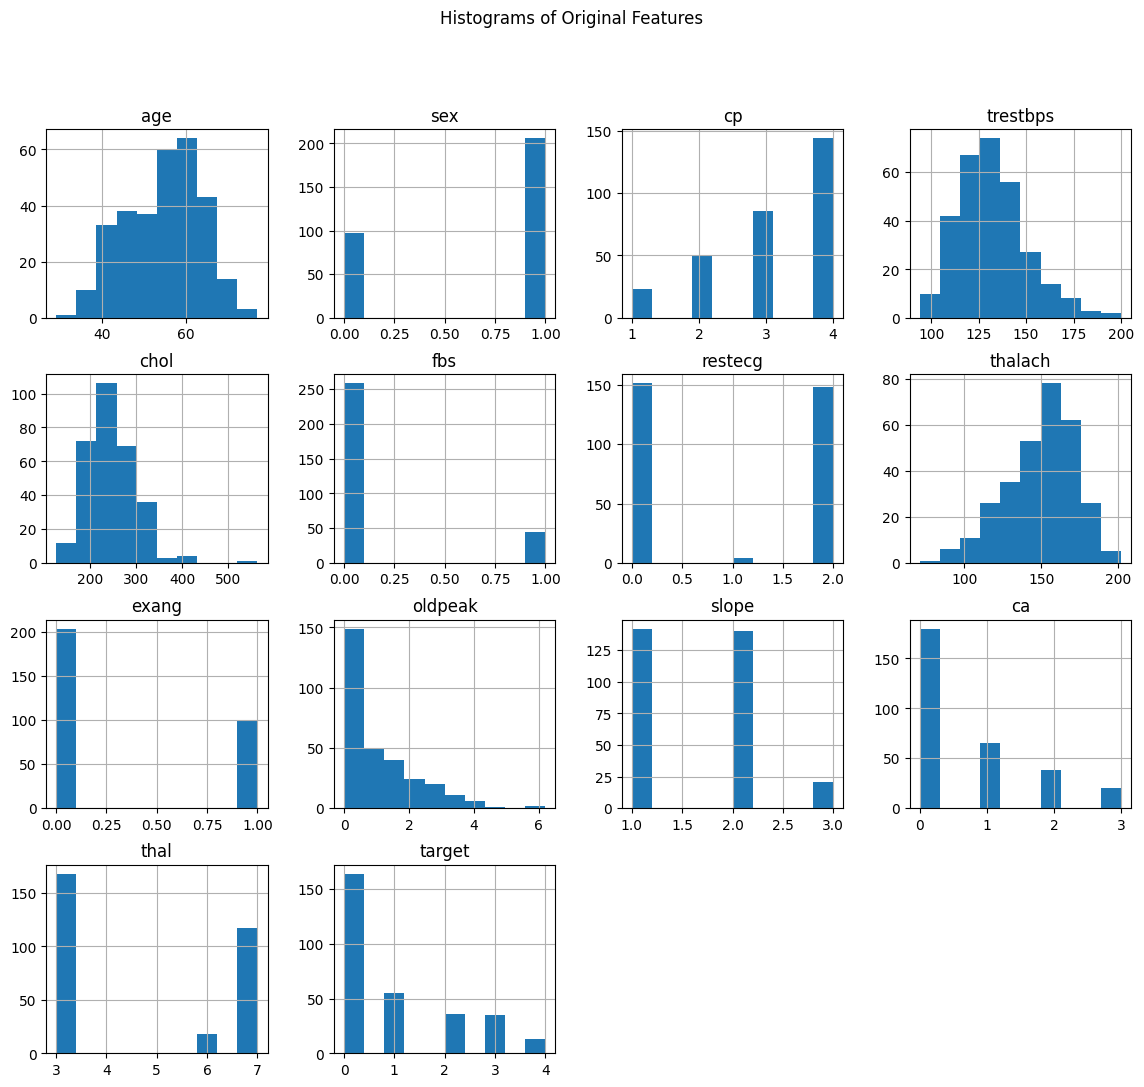

In [6]:
df.hist(figsize=(14, 12))
plt.suptitle("Histograms of Original Features")
plt.show()

EDA with correlation heatmap

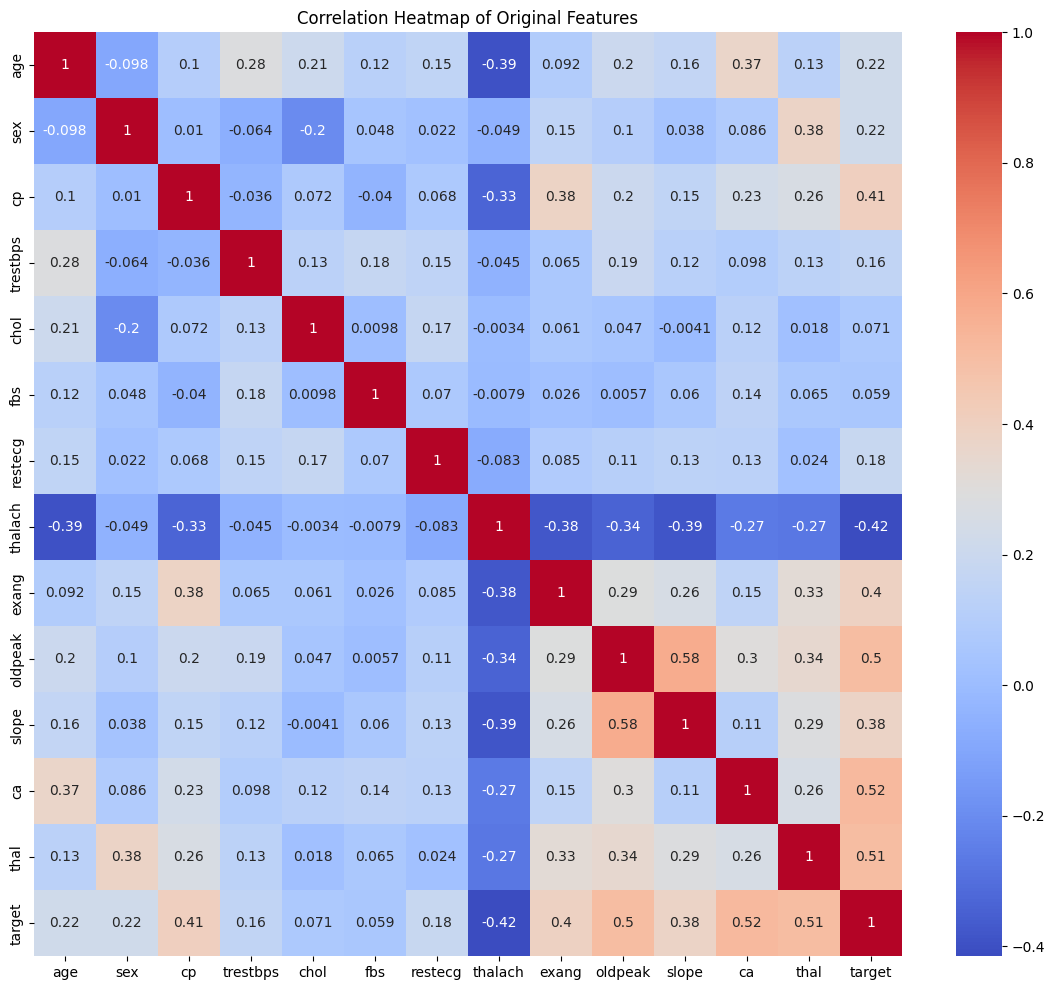

In [7]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Original Features")
plt.show()

EDA with boxplots

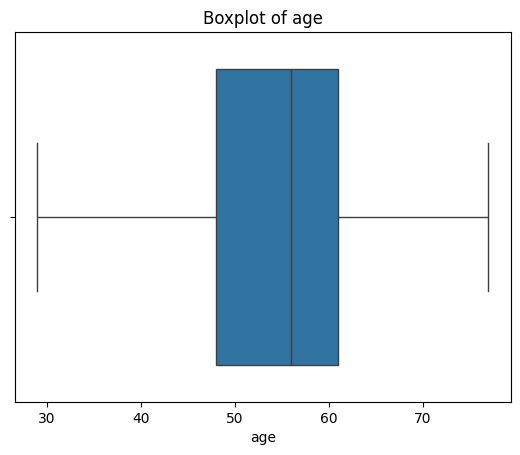

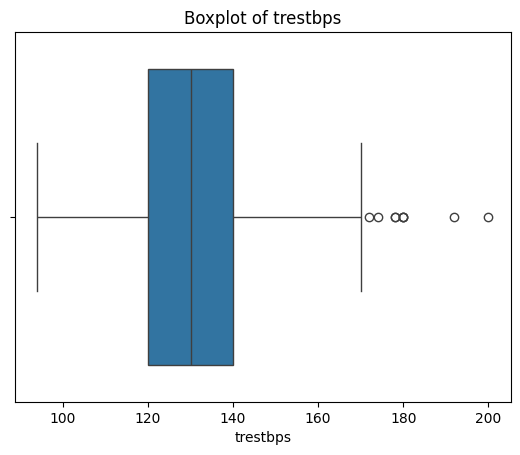

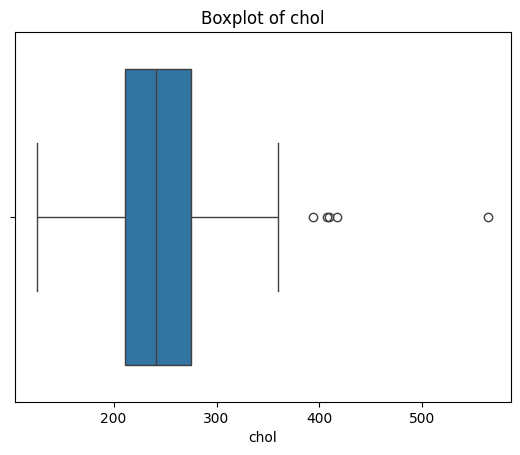

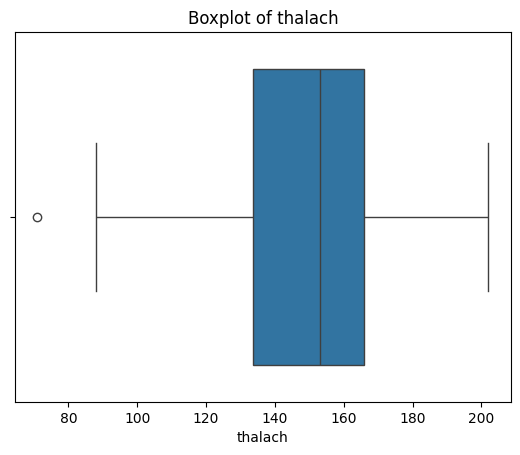

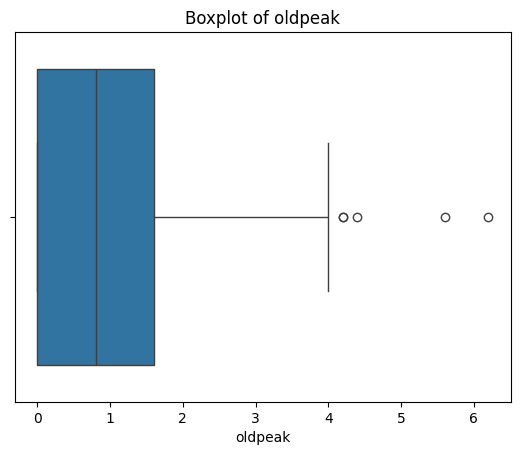

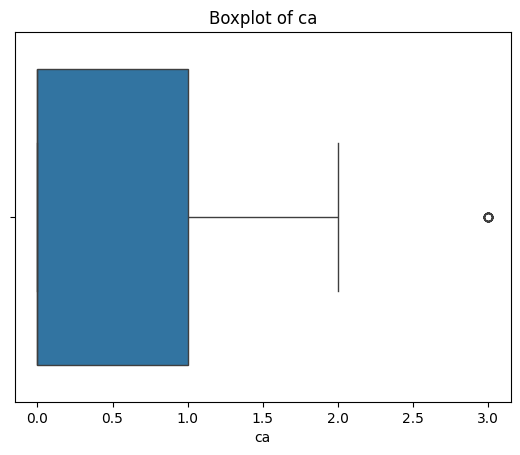

In [8]:
for i in numerical_cols:
    plt.figure()
    sns.boxplot(x=i, data=df)
    plt.title(f"Boxplot of {i}")
    plt.show()

## 7. Saving the cleaned dataset

In [9]:
df_encoded.to_csv("../data/cleaned_heart_disease.csv", index=False)